In [ ]:
# load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
# load the data
loan = pd.read_csv('/content/loan_data.csv')
loan.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


## Data Checks

In [ ]:
print(f"The dataset has {loan.shape[0]} number of rows and {loan.shape[1]} number of columns")

The dataset has 45000 number of rows and 14 number of columns


## Duplicates in the dataset

In [ ]:
loan.duplicated().sum()

np.int64(0)

### The dataset has no duplicates observations

## Missing values in the dataset

In [ ]:
loan.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


### No missing values in the dataset

## Data types

In [ ]:
loan.dtypes

,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


### The dataset has a mix of data types - both numeric and categorical data (ordinal and nominal columns)

## Statistical Preview of numeric columns

In [ ]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


## Statistical preview of the categorical columns

In [ ]:
loan.describe(include='object').T

,count,unique,top,freq
person_gender,45000,2,male,24841
person_education,45000,5,Bachelor,13399
person_home_ownership,45000,4,RENT,23443
loan_intent,45000,6,EDUCATION,9153
previous_loan_defaults_on_file,45000,2,Yes,22858


## Data Visualization (EDA)

In [ ]:
numeric_columns = loan.select_dtypes(include='number').columns
print(numeric_columns)

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')


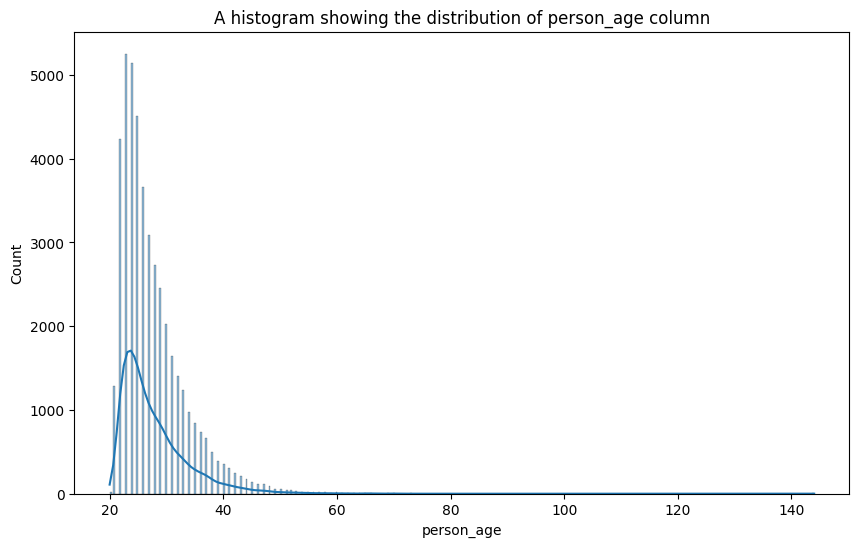

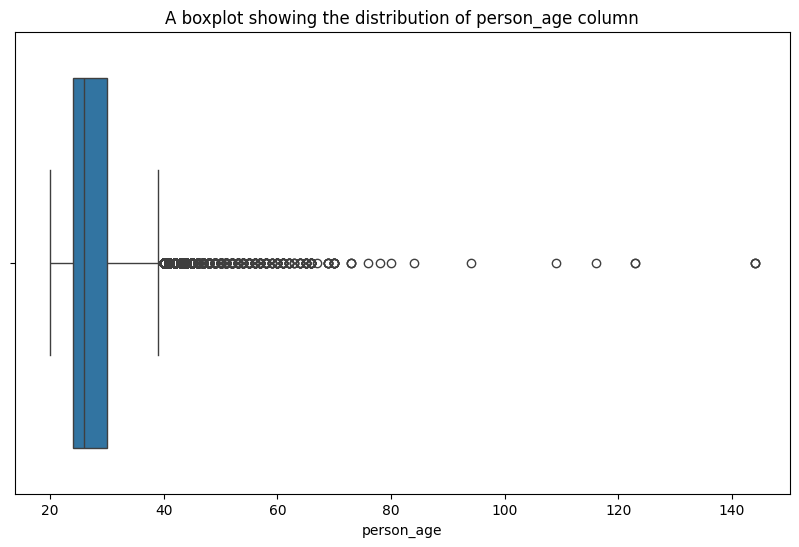

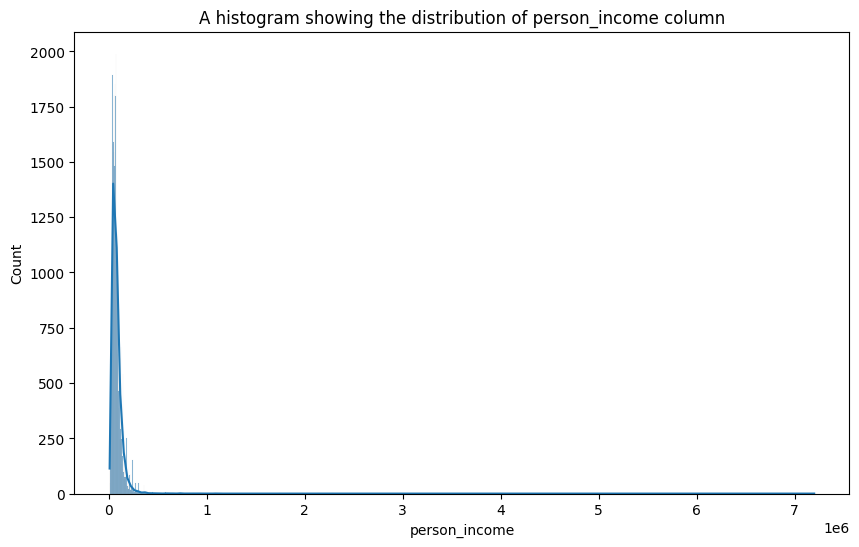

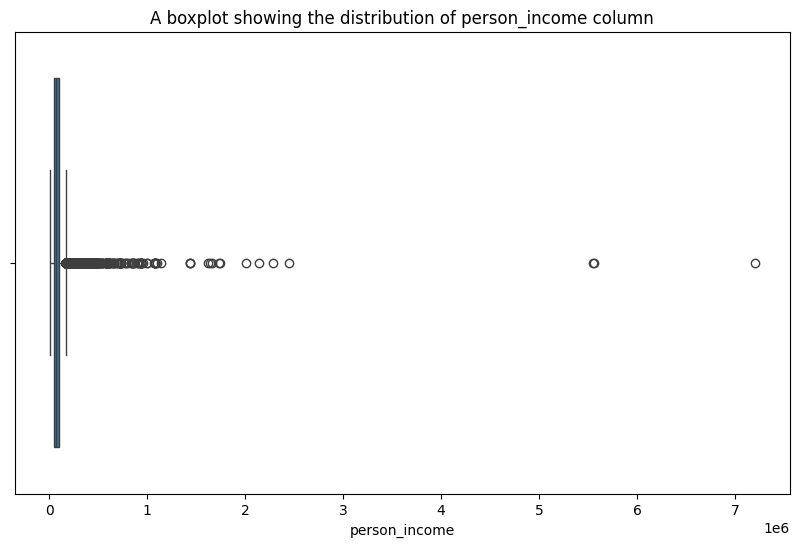

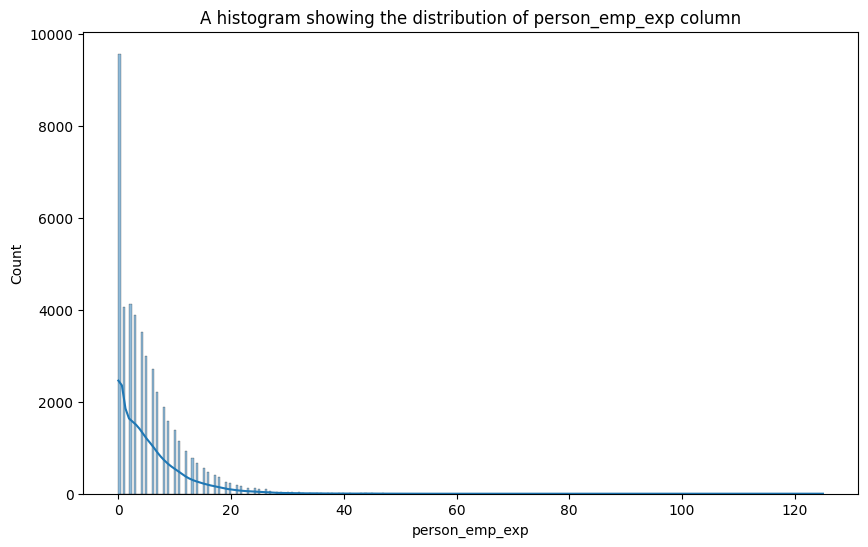

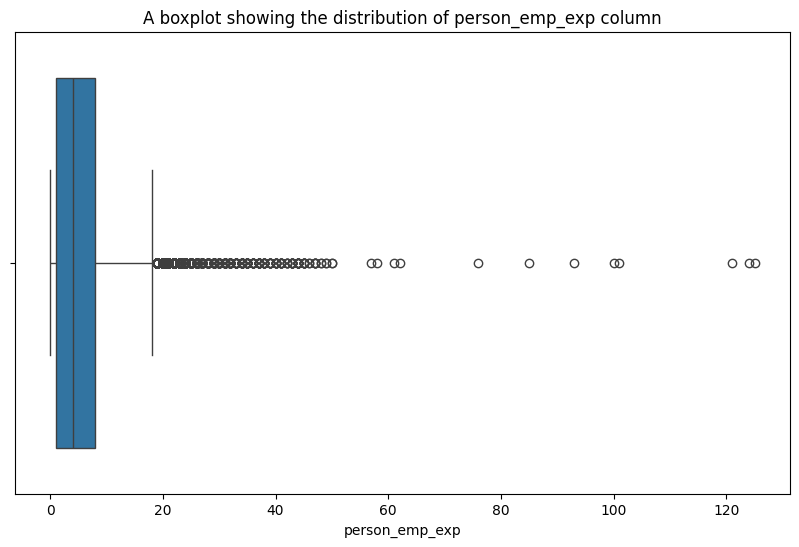

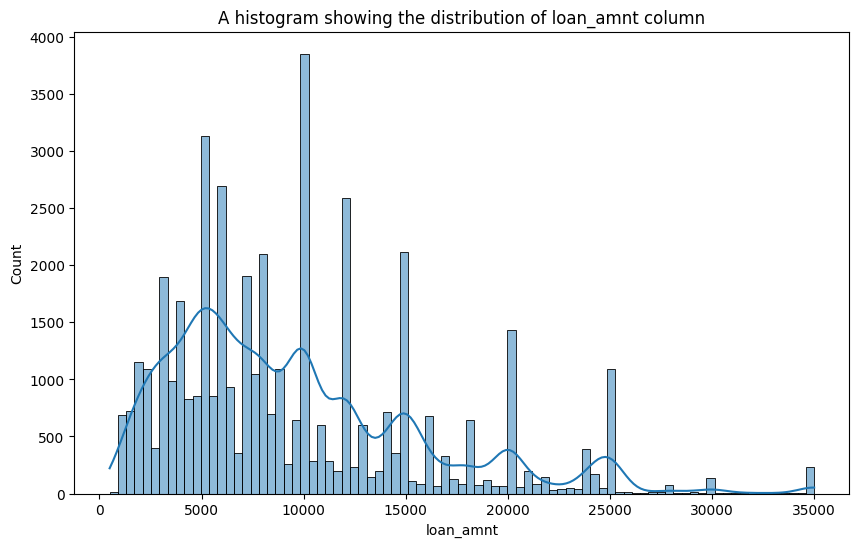

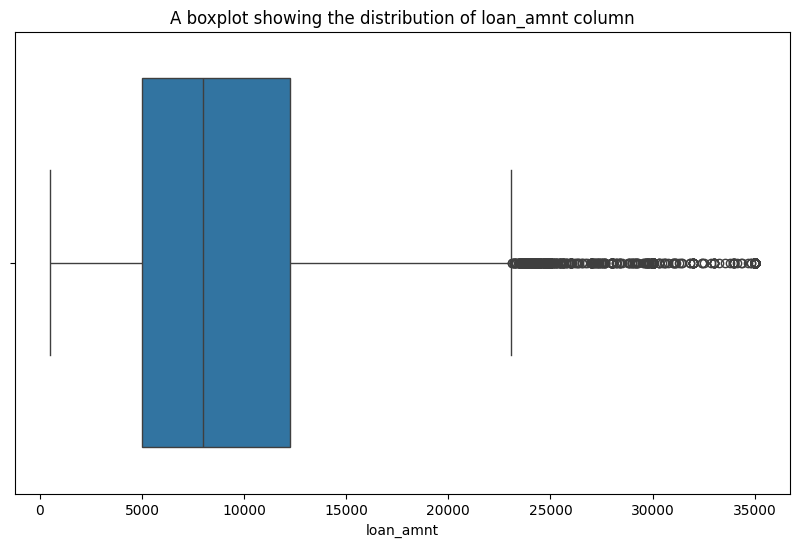

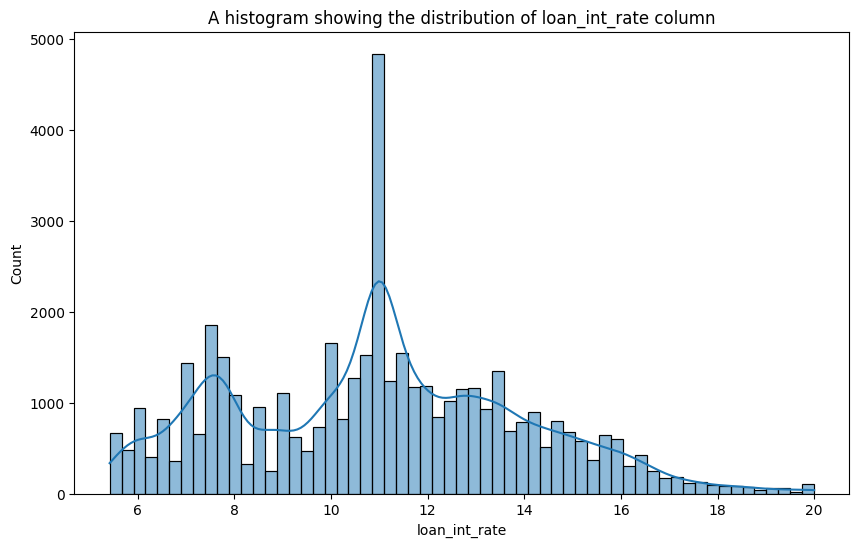

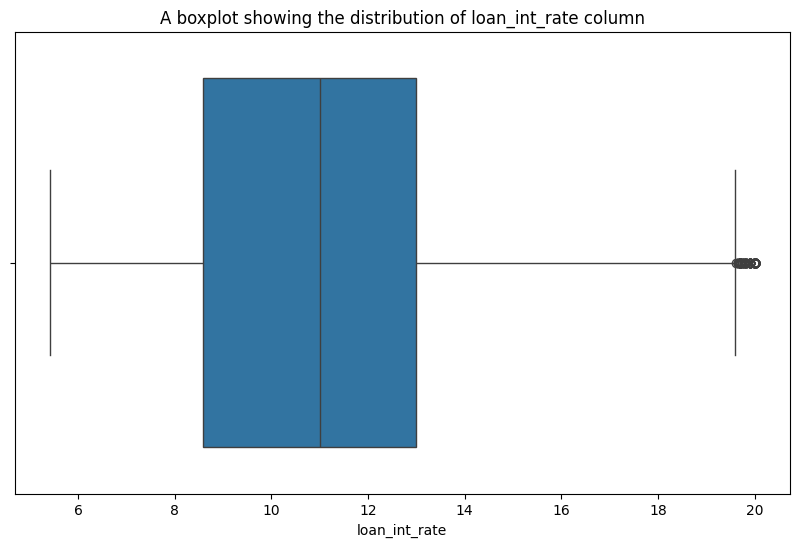

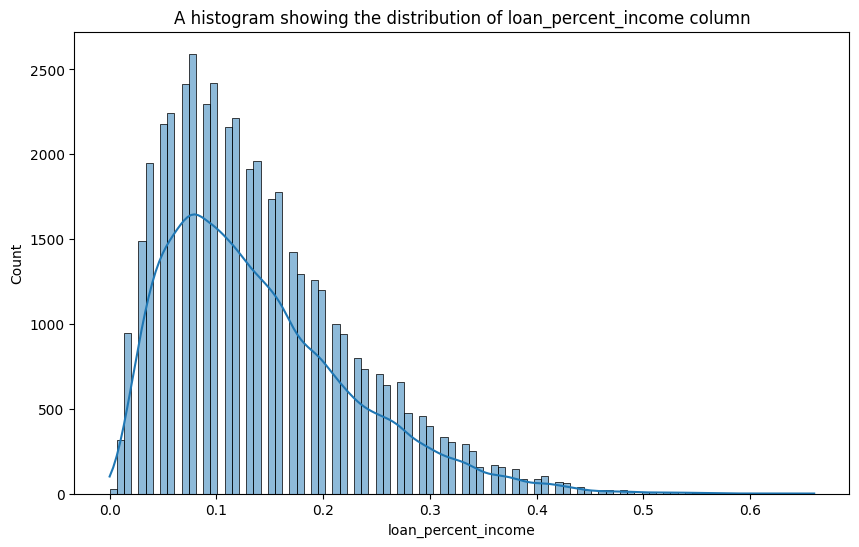

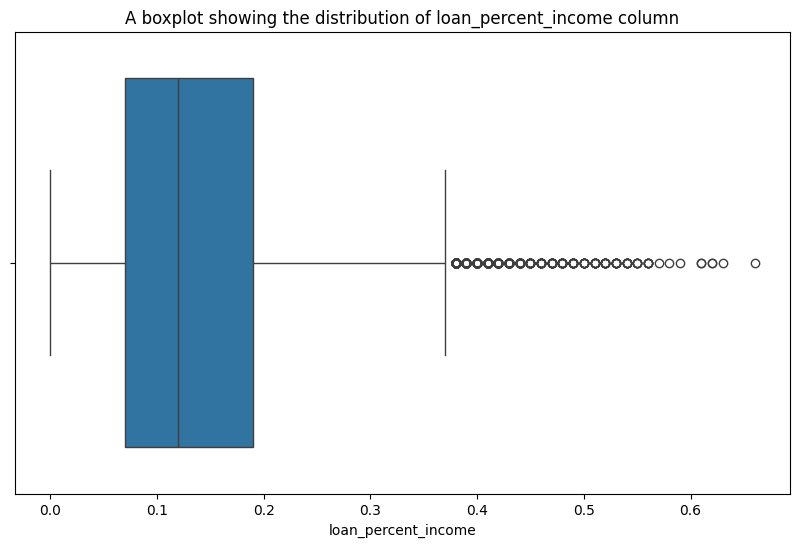

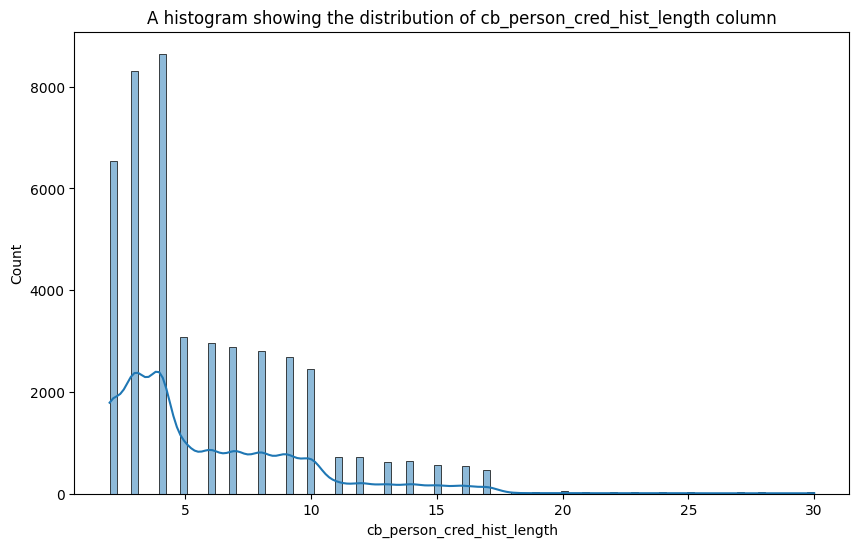

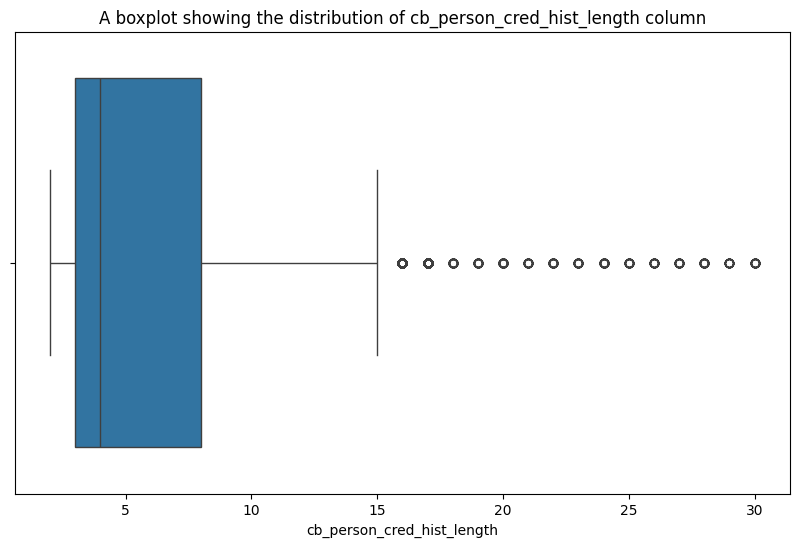

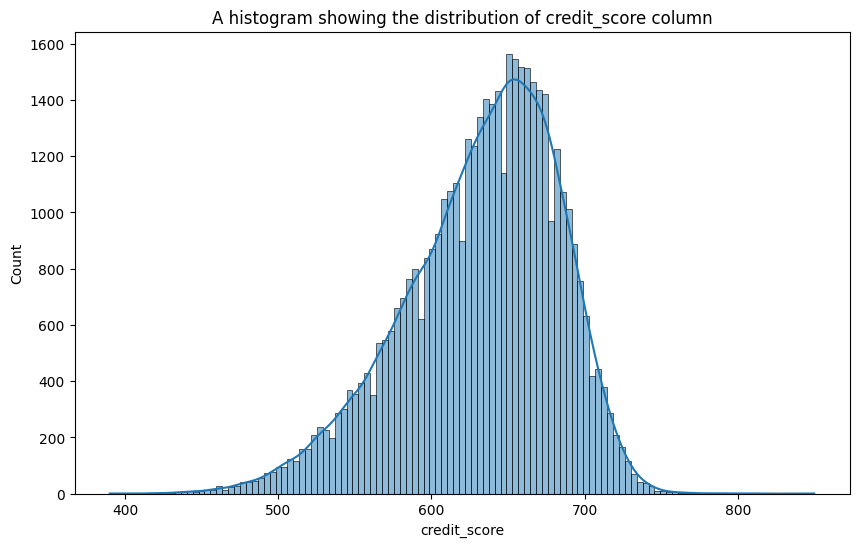

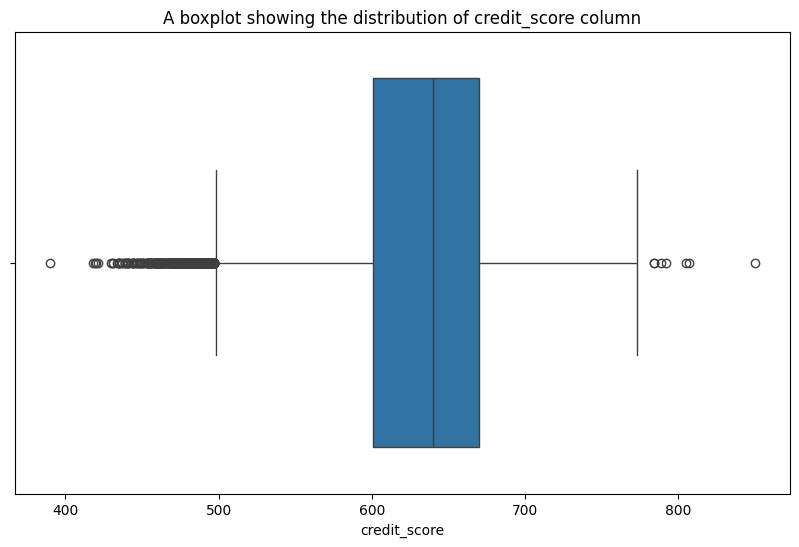

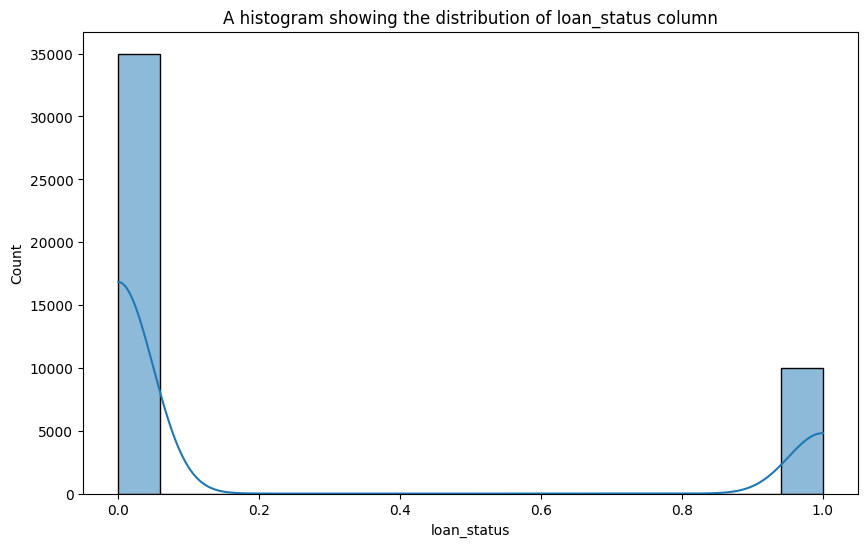

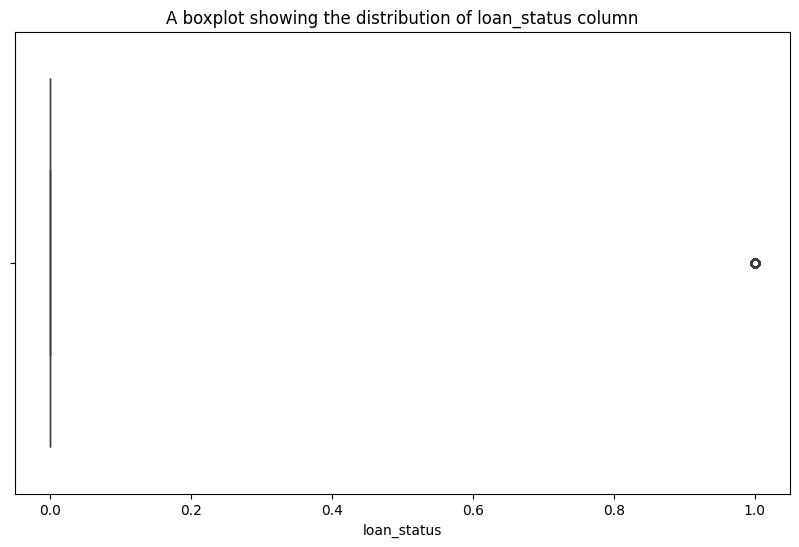

In [ ]:
# Plot both the histogram and boxplot of each numeric column
for col in numeric_columns:
  plt.figure(figsize=(10,6))
  sns.histplot(data=loan, x=col, kde=True)
  plt.title(f"A histogram showing the distribution of {col} column")
  plt.xlabel(f"{col}")

  plt.figure(figsize=(10,6))
  sns.boxplot(data=loan, x=col)
  plt.title(f"A boxplot showing the distribution of {col} column")
  plt.xlabel(f"{col}")


In [ ]:
# Plot countplot of categorical variables
categorical_columns = loan.select_dtypes(include='object').columns
print(categorical_columns)

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')


/tmp/ipython-input-1667092399.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan, x=col, palette='Set2')
/tmp/ipython-input-1667092399.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan, x=col, palette='Set2')
/tmp/ipython-input-1667092399.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan, x=col, palette='Set2')
/tmp/ipython-input-1667092399.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

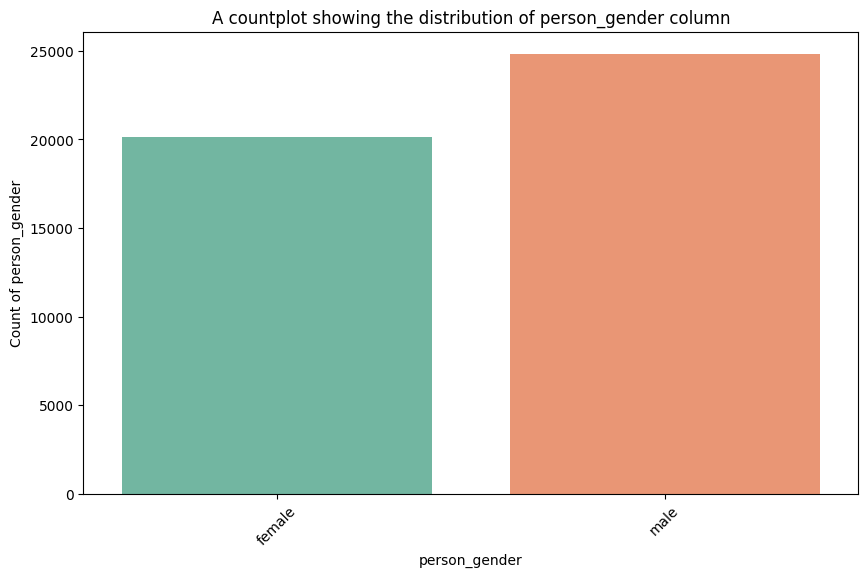

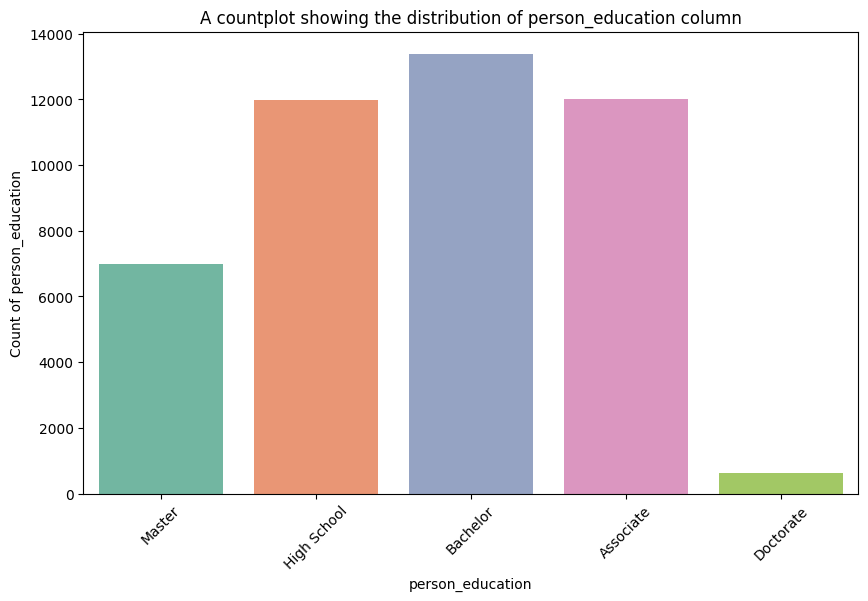

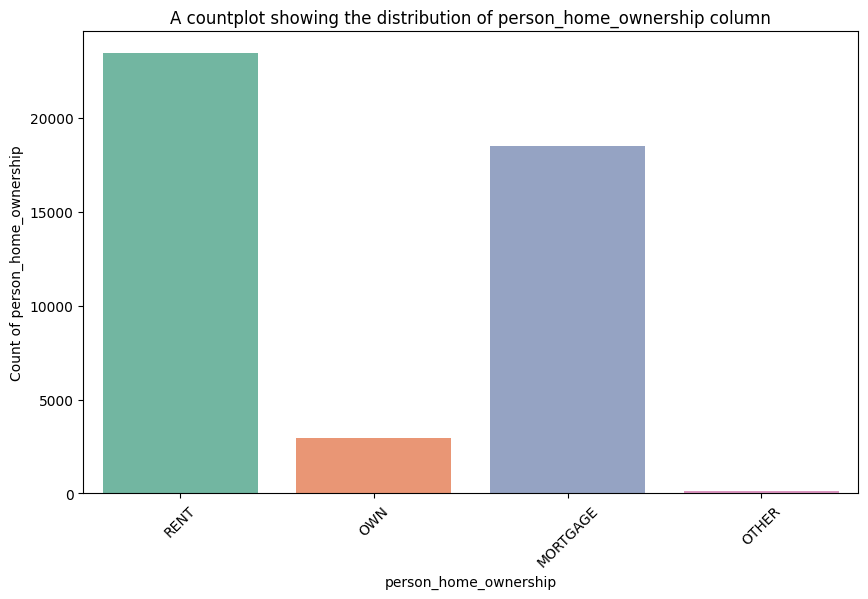

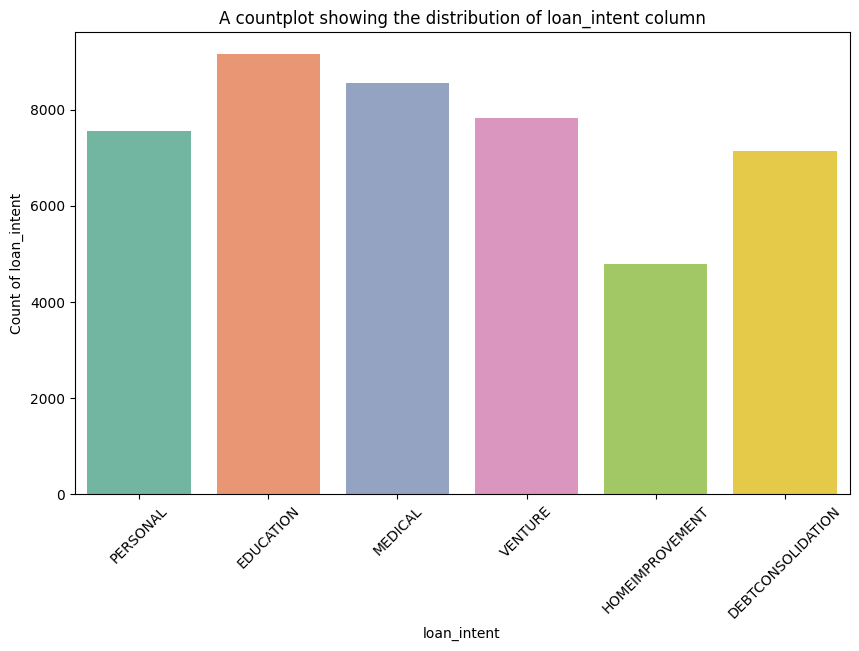

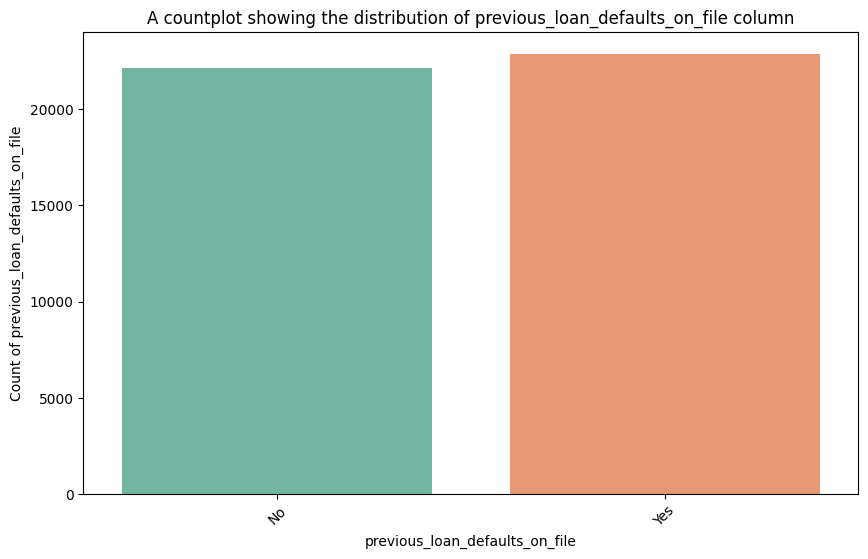

In [ ]:
for col in categorical_columns:
  plt.figure(figsize=(10,6))
  sns.countplot(data=loan, x=col, palette='Set2')
  plt.title(f"A countplot showing the distribution of {col} column")
  plt.xlabel(f"{col}")
  plt.ylabel(f"Count of {col}")
  plt.xticks(rotation=45)

/tmp/ipython-input-2908759989.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=loan, x=col, y='loan_status', palette='viridis')
/tmp/ipython-input-2908759989.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=loan, x=col, y='loan_status', palette='viridis')
/tmp/ipython-input-2908759989.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=loan, x=col, y='loan_status', palette='viridis')
/tmp/ipython-input-2908759989.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

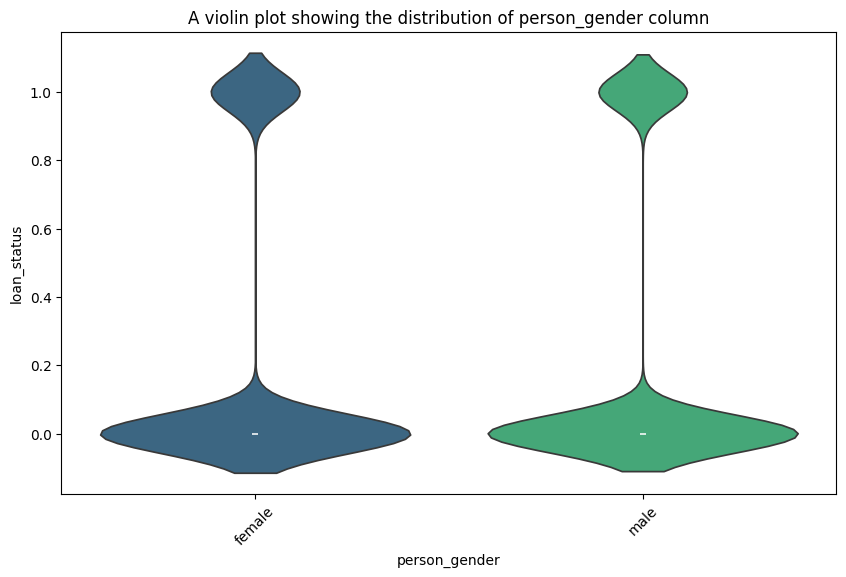

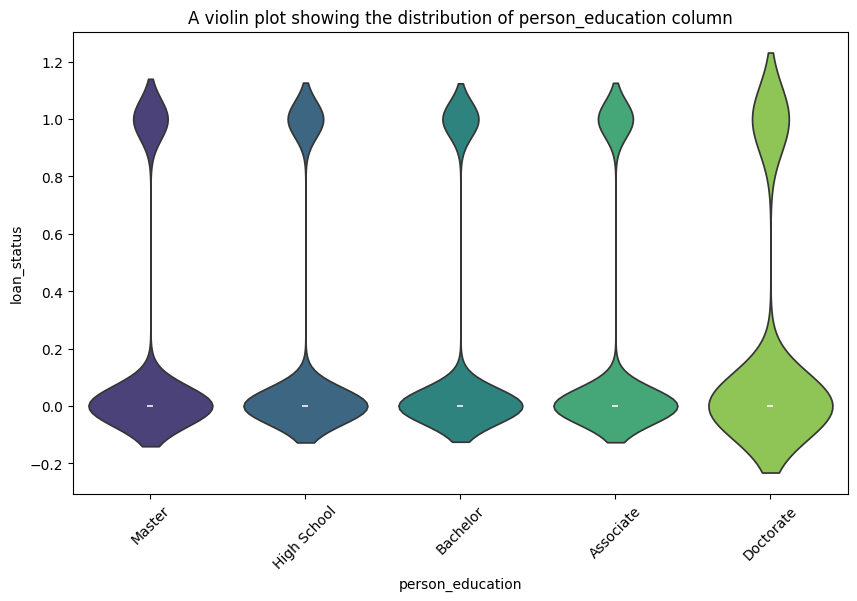

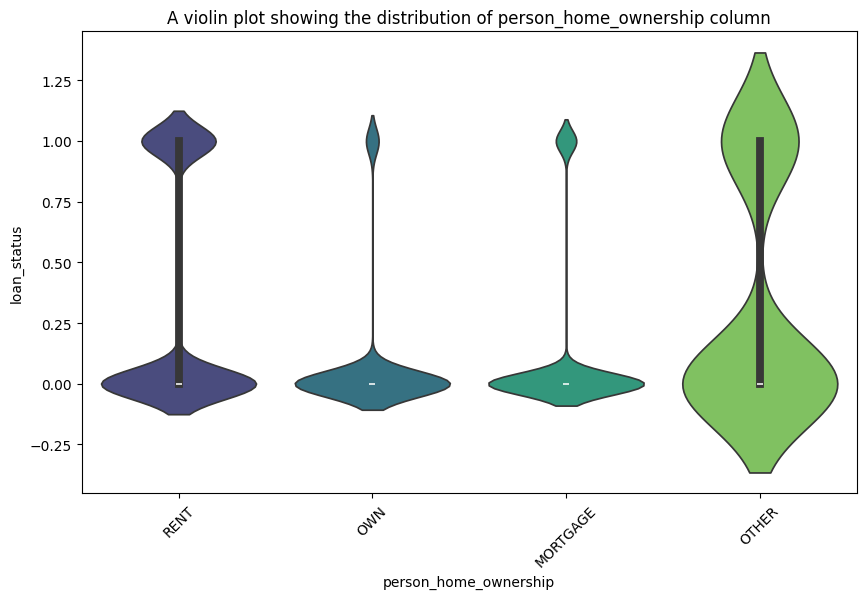

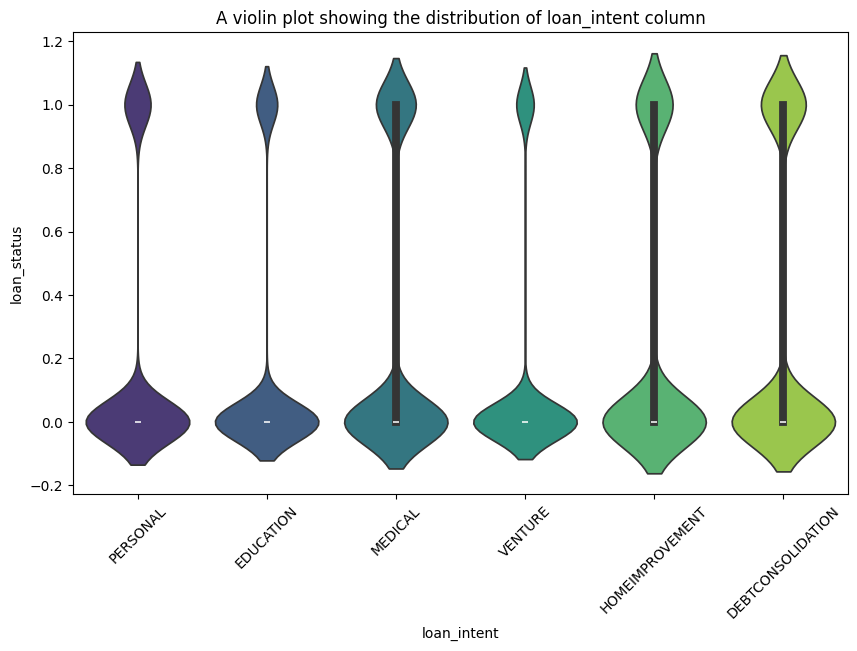

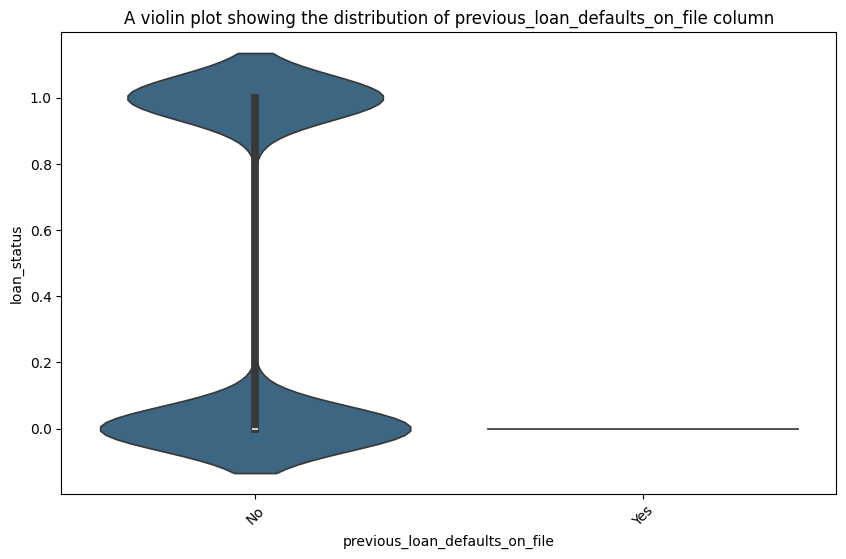

In [ ]:
# Plot a violin plot with categorical columns versus the loan status
for col in categorical_columns:
  plt.figure(figsize=(10,6))
  sns.violinplot(data=loan, x=col, y='loan_status', palette='viridis')
  plt.title(f"A violin plot showing the distribution of {col} column")
  plt.xlabel(f"{col}")
  plt.xticks(rotation=45)

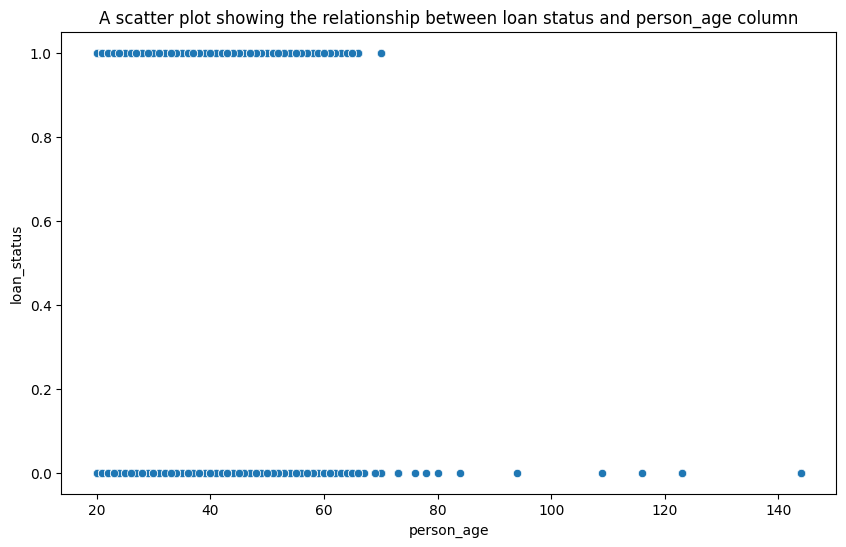

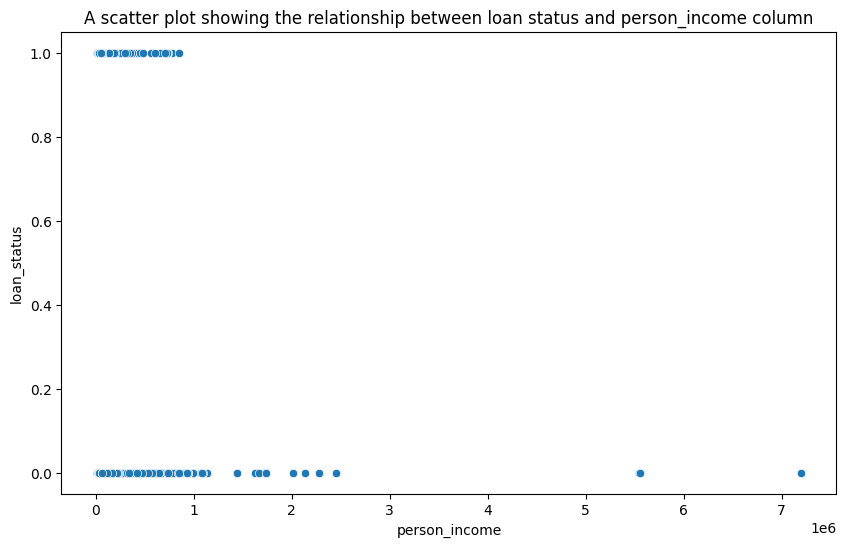

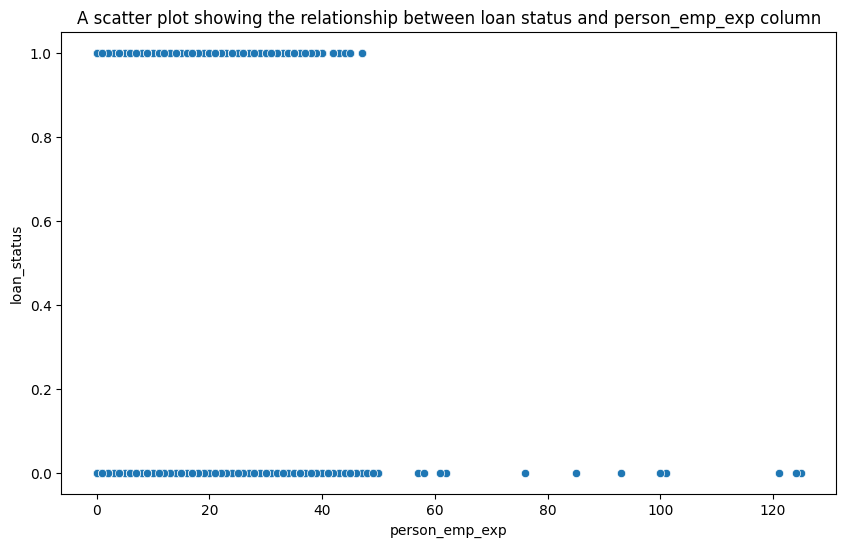

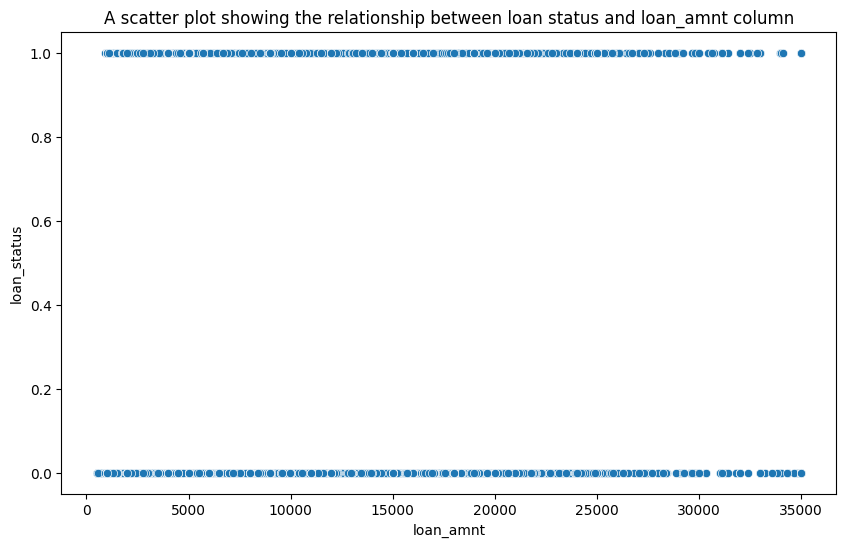

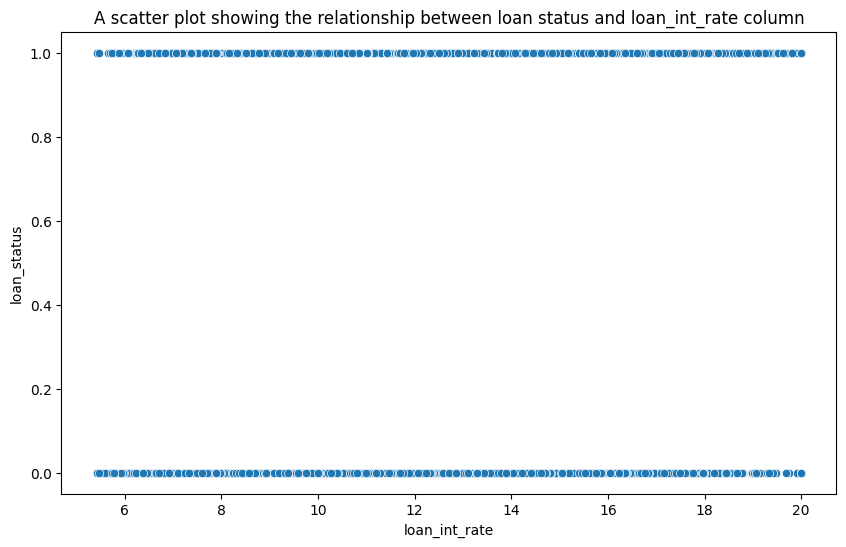

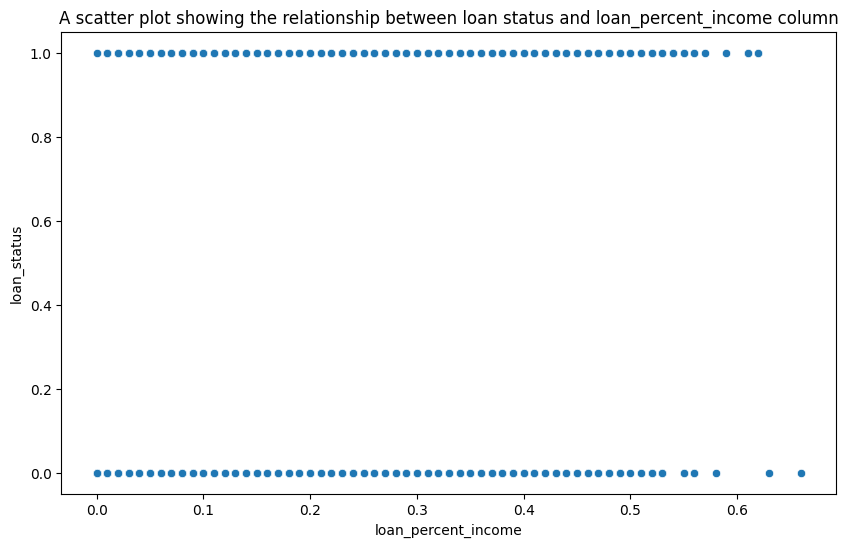

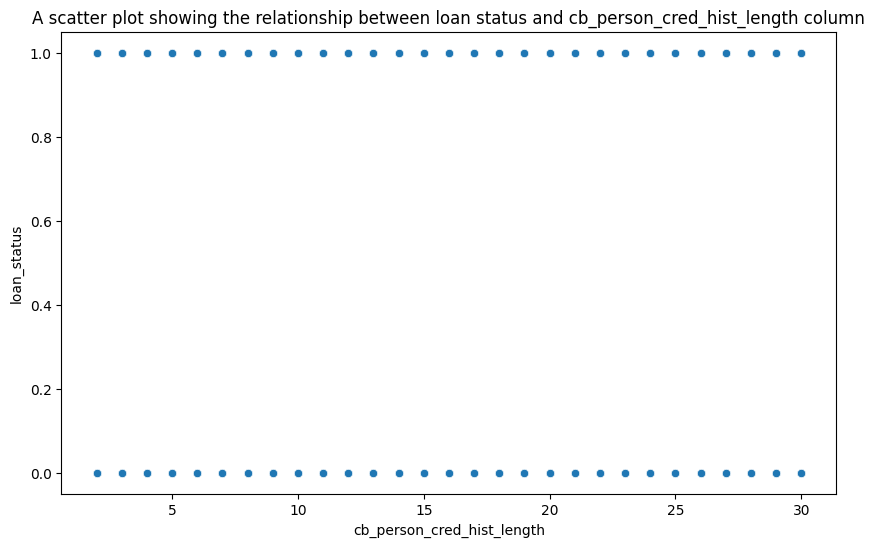

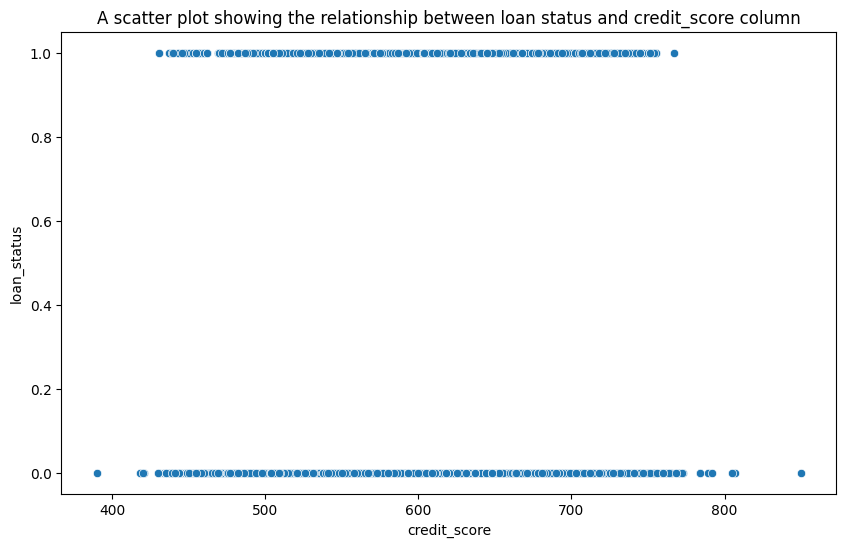

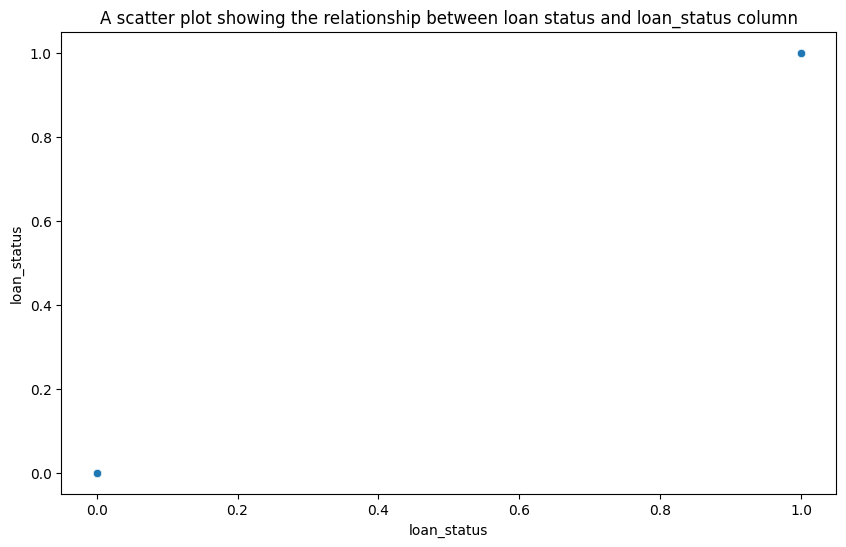

In [ ]:
# Plot a scatterplot of loan status against the numeric columns
for col in numeric_columns:
  plt.figure(figsize=(10,6))
  sns.scatterplot(data=loan, x=col, y='loan_status')
  plt.title(f"A scatter plot showing the relationship between loan status and {col} column")
  plt.xlabel(f"{col}")

## Group by function

In [ ]:
# Group loan amount by gender then plot a barchart
gender_amount = pd.DataFrame(loan.groupby('person_gender')['loan_amnt'].mean())
print(gender_amount)

                 loan_amnt
person_gender             
female         9508.525770
male           9643.722837


/tmp/ipython-input-444645369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_amount, x=gender_amount.index, y='loan_amnt', palette='deep')


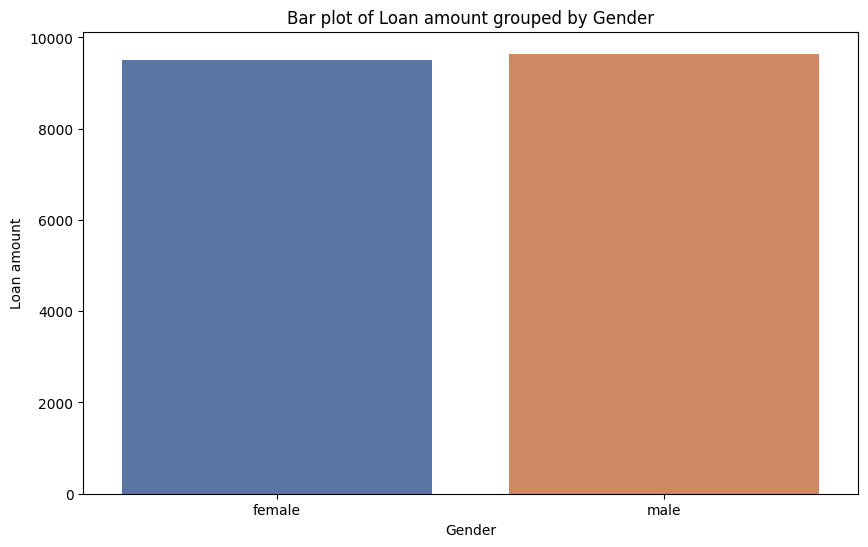

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=gender_amount, x=gender_amount.index, y='loan_amnt', palette='deep')
plt.title('Bar plot of Loan amount grouped by Gender')
plt.xlabel('Gender')
plt.ylabel('Loan amount')
plt.show()

In [ ]:
# Group income by person's education
income_educ = pd.DataFrame(loan.groupby('person_education')['person_income'].mean())
print(income_educ)

                  person_income
person_education               
Associate          80641.623628
Bachelor           79703.319725
Doctorate          87234.541063
High School        80224.597645
Master             80491.924355


/tmp/ipython-input-2396380446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_educ, x=income_educ.index, y='person_income', palette='deep')


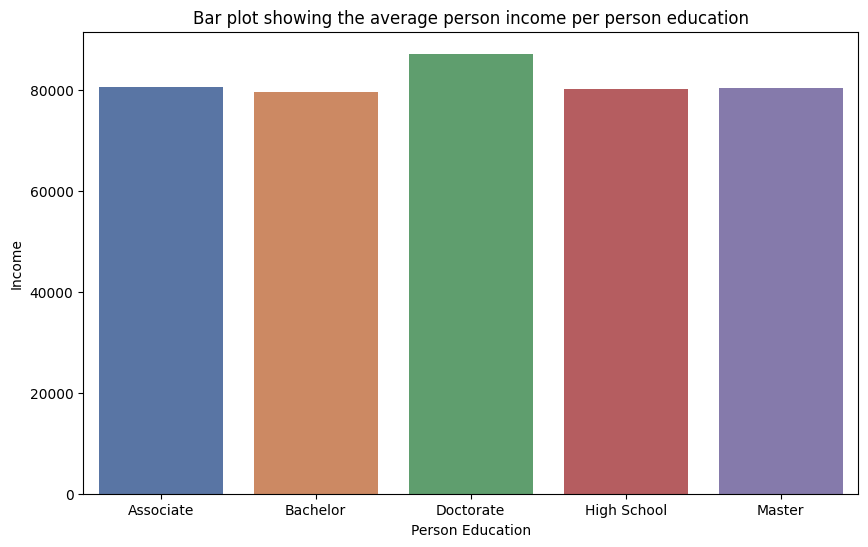

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=income_educ, x=income_educ.index, y='person_income', palette='deep')
plt.title('Bar plot showing the average person income per person education')
plt.xlabel('Person Education')
plt.ylabel('Income')
plt.show()

In [ ]:
# Group loan amount by gender and loan intent
amount_gender_intent = pd.DataFrame(loan.groupby(['person_gender', 'loan_intent'])['loan_amnt'].mean())
print(amount_gender_intent.sort_values(by = 'loan_amnt', ascending=False))

                                    loan_amnt
person_gender loan_intent                    
male          HOMEIMPROVEMENT    10538.536512
female        HOMEIMPROVEMENT    10271.785514
male          VENTURE             9771.255486
              PERSONAL            9685.566619
              DEBTCONSOLIDATION   9651.178410
female        VENTURE             9519.528367
male          EDUCATION           9515.049665
female        PERSONAL            9503.890984
              EDUCATION           9497.897769
              DEBTCONSOLIDATION   9419.445285
              MEDICAL             9166.127156
male          MEDICAL             9114.490886


In [ ]:
# Group loan amount by gender and home ownership
amount_gender_ownership = pd.DataFrame(loan.groupby(['person_gender', 'person_home_ownership'])['loan_amnt'].mean())
print(amount_gender_ownership.sort_values(by = 'loan_amnt', ascending=False))

                                        loan_amnt
person_gender person_home_ownership              
female        OTHER                  11946.500000
male          MORTGAGE               10812.089191
              OTHER                  10786.671642
female        MORTGAGE               10599.254622
male          OWN                     9073.032947
female        OWN                     8864.500000
male          RENT                    8786.597941
female        RENT                    8719.444022


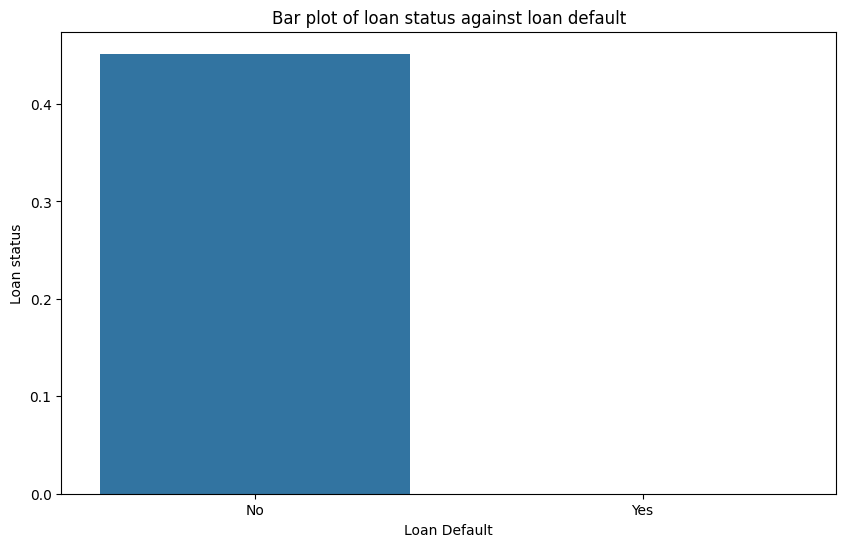

In [ ]:
# Bar plot of loan status versus loan default
plt.figure(figsize=(10,6))
sns.barplot(data=loan, x='previous_loan_defaults_on_file', y='loan_status', errorbar=None)
plt.title('Bar plot of loan status against loan default')
plt.xlabel('Loan Default')
plt.ylabel('Loan status')
plt.show()

## Feature Engineering

In [ ]:
# Label encoding
#le = LabelEncoder()
#not_included = ['person_gender', 'loan_intent']
#for col in categorical_columns:
  #if col not in not_included:
    #loan[col] = le.fit_transform(loan[col])
   # print(f"Encoded column {col}")

In [ ]:
loan.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [ ]:
# One Hot encoding
#df = loan[['person_gender', 'loan_intent']]
#df_encoded = pd.get_dummies(columns=df.columns, data=df, drop_first=True).astype(int)
#df_encoded

In [ ]:
# Merge the 2 dataframes
#loan_df = pd.concat([loan, df_encoded], axis=1)
#loan_df.head(10)

In [ ]:
# Drop redundant columns
#loan_df.drop(columns=['person_gender', 'loan_intent'], axis=1)
#loan_df.shape

In [ ]:
# Data preparation for Modeling
# Define the dependent and independent variables
X = loan.drop(['loan_status'],axis=1)
y = loan[['loan_status']]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"*"*50)
print(f"Shape of X_test: {X_test.shape}")
print(f"*"*50)
print(f"Shape of y_train: {y_train.shape}")
print(f"*"*50)
print(f"Shape of y_test: {y_test.shape}")
print(f"*"*50)

Shape of X_train: (36000, 13)
**************************************************
Shape of X_test: (9000, 13)
**************************************************
Shape of y_train: (36000, 1)
**************************************************
Shape of y_test: (9000, 1)
**************************************************


In [ ]:
# Scale the data
#scaler = MinMaxScaler()
#X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
#X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
#X_train_scaled.head(5)

ValueError: could not convert string to float: 'female'

Automating the preprocessing and fitting steps

In [ ]:

# Define the pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [ ]:
numeric_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score']

In [ ]:
categorical_columns

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
categorical_transformer = OneHotEncoder()

In [ ]:
numerical_transformer = StandardScaler()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipe = Pipeline(steps=[
                ('prep', preprocessor),
                ('Classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

In [ ]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length',
                                                   'credit_score']),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object'))])),
                ('Classifier', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(f"classification report: {classification_report(y_pred, y_test)}")

classification report:               precision    recall  f1-score   support

           0       0.97      0.94      0.96      7258
           1       0.77      0.89      0.83      1742

    accuracy                           0.93      9000
   macro avg       0.87      0.92      0.89      9000
weighted avg       0.94      0.93      0.93      9000



In [ ]:
# Save the model
import joblib
# Save the pipeline
joblib.dump(pipe, 'model_pipeline.pkl')

['model_pipeline.pkl']